<a href="https://colab.research.google.com/github/gpriya32/Comparision-of-ANN-and-Logistic/blob/master/Classification_ANN_VS_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
x_test=pd.read_csv('/content/drive/My Drive/DATASETS/Logistic_X_Test.csv')
x_train=pd.read_csv('/content/drive/My Drive/DATASETS/Logistic_X_Train.csv')
y_train=pd.read_csv('/content/drive/My Drive/DATASETS/Logistic_Y_Train.csv')
y_test=pd.read_csv('/content/drive/My Drive/DATASETS/SampleOutput.csv')

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

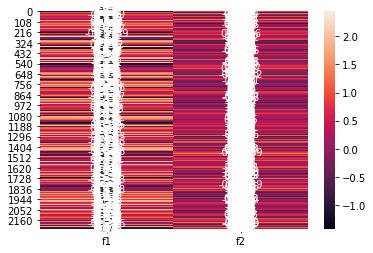

In [11]:
sns.heatmap(x_train,annot=True)

In [6]:
scaler=MinMaxScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[0.16156233, 0.40146849],
       [0.17243048, 0.83128144],
       [0.6363435 , 0.25483312],
       ...,
       [0.60478388, 0.61806895],
       [0.15808928, 0.67340066],
       [0.22671352, 0.46945508]])

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2250 non-null   float64
 1   f2      2250 non-null   float64
dtypes: float64(2)
memory usage: 35.3 KB


In [12]:
y_train.shape

(2250, 1)

In [18]:
y_test.shape

(2250, 1)

In [20]:
x_test.shape

(750, 2)

In [67]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
log_pred=lr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [60]:
# model
ann=Sequential()

# first layer
ann.add(Dense(units=4,kernel_initializer='uniform',activation='relu',input_dim=2))

# hidden layer
ann.add(Dense(units=4,kernel_initializer='uniform',activation='relu'))

# output layer
ann.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))


In [61]:
ann.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [62]:
ann.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [63]:
history=ann.fit(x_train,y_train,batch_size=32,epochs=100,validation_split=0.2)

Train on 1800 samples, validate on 450 samples
Epoch 1/100
1800/1800 [==============================] - 0s 102us/step - loss: 0.6929 - accuracy: 0.5700 - val_loss: 0.6924 - val_accuracy: 0.4689
Epoch 2/100
1800/1800 [==============================] - 0s 43us/step - loss: 0.6888 - accuracy: 0.6594 - val_loss: 0.6824 - val_accuracy: 0.8200
Epoch 3/100
1800/1800 [==============================] - 0s 45us/step - loss: 0.6667 - accuracy: 0.8278 - val_loss: 0.6406 - val_accuracy: 0.8400
Epoch 4/100
1800/1800 [==============================] - 0s 43us/step - loss: 0.6104 - accuracy: 0.8178 - val_loss: 0.5619 - val_accuracy: 0.8422
Epoch 5/100
1800/1800 [==============================] - 0s 42us/step - loss: 0.5350 - accuracy: 0.8244 - val_loss: 0.4817 - val_accuracy: 0.8467
Epoch 6/100
1800/1800 [==============================] - 0s 46us/step - loss: 0.4688 - accuracy: 0.8317 - val_loss: 0.4216 - val_accuracy: 0.8622
Epoch 7/100
1800/1800 [==============================] - 0s 49us/step - loss

In [64]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0, 0.5, 'Accuracy')

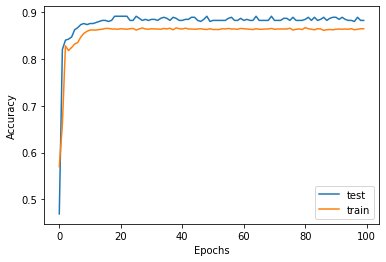

In [65]:
plt.plot(history.history['val_accuracy'],label='test')
plt.plot(history.history['accuracy'],label='train')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

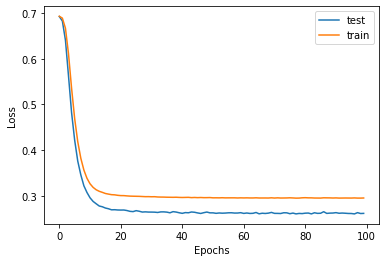

In [66]:
plt.plot(history.history['val_loss'],label='test')
plt.plot(history.history['loss'],label='train')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [73]:
ann_pred=ann.predict(x_test)
print(ann_pred)
ann_pred=ann_pred>0.5

[[0.3701579 ]
 [0.00843972]
 [0.96989405]
 [0.01920423]
 [0.9881327 ]
 [0.40767607]
 [0.42633218]
 [0.00489968]
 [0.76291287]
 [0.09130022]
 [0.86120343]
 [0.98758644]
 [0.01966009]
 [0.99361753]
 [0.7224209 ]
 [0.7436701 ]
 [0.05312833]
 [0.01398885]
 [0.9744898 ]
 [0.04945579]
 [0.01124936]
 [0.9140499 ]
 [0.96315265]
 [0.01103309]
 [0.9870097 ]
 [0.01796946]
 [0.04937476]
 [0.20771348]
 [0.19660571]
 [0.46615747]
 [0.91819   ]
 [0.22693974]
 [0.9717934 ]
 [0.71350276]
 [0.30039006]
 [0.96269023]
 [0.97715735]
 [0.05302498]
 [0.23972741]
 [0.93661046]
 [0.08833623]
 [0.321988  ]
 [0.02056286]
 [0.9816731 ]
 [0.8372439 ]
 [0.06740239]
 [0.9628487 ]
 [0.96003366]
 [0.25048852]
 [0.33658588]
 [0.9926276 ]
 [0.45093673]
 [0.9763305 ]
 [0.9711326 ]
 [0.9303162 ]
 [0.95892125]
 [0.17472386]
 [0.5020601 ]
 [0.01781583]
 [0.01113287]
 [0.12945819]
 [0.35727832]
 [0.6040092 ]
 [0.08076403]
 [0.0727644 ]
 [0.98681545]
 [0.9532615 ]
 [0.91983396]
 [0.8334837 ]
 [0.01737395]
 [0.9600327 ]
 [0.99

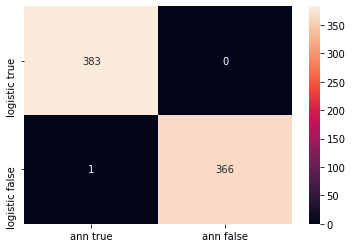

In [82]:
cm=confusion_matrix(log_pred,ann_pred)
sns.heatmap(cm,yticklabels=['logistic true','logistic false'],xticklabels=['ann true','ann false'],annot=True,fmt='d')



In [83]:
accuracy_score(log_pred,ann_pred)

0.9986666666666667